In [44]:
##########################################ALL NEEDED IMPORT FOR THE PROJECT ############################################
####################General Imports
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix
###################Imports for Splitting Data
from sklearn.model_selection import train_test_split
###################Imports for data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
###################Import for Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
###################GridSearch
from sklearn.model_selection import GridSearchCV
##################Import Binarize
from sklearn .preprocessing import binarize
##################Imports for Clasification Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
###################Imports for Accuracy check
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
###################StringIO
from sklearn.externals.six import StringIO 
from IPython.display import Image



In [45]:
###########################################################################################################################

In [46]:
##########################   HELPER FUNCTION I HAVE WIRTTEN TO MAKE ANALYSYS EASY     ####################################

In [47]:
##CAUTION - VERY HEAVY FUNCTION --- keep the folds under check or it Might result in Noteboot Hang or System Hang :)

#This Function Plots the ROC Curver for Decission Tree, RandomForest, AdaBoost and GradientBoost for a Given DataFrame
#It also checks the Training Accuracy and KFold Testing Accurary for a given dataset and input columns and output column.
#It aso prints the AUC (Area under the Curve) 

#This Function I have used to get a Quick Idea on what Algorithm  works better on a Give DataSet

def Plot_Roc_All(df, input_cols, output_col,t_size=0.2, random_state=1, folds=2):
     #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=random_state)
    
    print("AUC(Area Under the Curve) and Corss Validation Accuracy({0} folds) :\n".format(folds))
    print("____________________________________________________________________________________________\n")
    kfold = KFold(n_splits=folds, random_state=random_state)
    
    print("DecissionTree Classifier")
    print("_________________________")
    model = DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)
    fpr1, tpr1, thresholds1 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    print("Train Accuracy  : {0}".format(accuracy_score(y_train, model.predict(x_train))))
    print("Cross Validation mean Test Accuracy for {0} folds is : {1}".format(folds, (cross_val_score(model, X,Y, cv=kfold, scoring='accuracy')).mean()))
    print("DecissionTree Classifier - AUC - {0}".format(roc_auc_score(y_test, model.predict_proba(x_test)[:,1])))
    print("From AUC the modle has {0}% chances of Distinguishing between Positive and Negative Classes\n\n".format(round((auc*100),2)))
    
    print("RandromForest Classifier")
    print("_________________________")
    model = RandomForestClassifier(criterion='entropy', n_estimators=10).fit(x_train,y_train)
    fpr2, tpr2, thresholds2 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    print("Train Accuracy  : {0}".format(accuracy_score(y_train, model.predict(x_train))))
    print("Cross Validation mean Test Accuracy for {0} folds is : {1}".format(folds, (cross_val_score(model, X,Y, cv=kfold, scoring='accuracy')).mean()))
    print("RandomForest Classifier - AUC - {0}".format(roc_auc_score(y_test, model.predict_proba(x_test)[:,1])))
    print("From AUC the modle has {0}% chances of Distinguishing between Positive and Negative Classes\n\n".format(round((auc*100),2)))
    
    print("AdaBoost Classifier")
    print("_________________________")
    model = AdaBoostClassifier().fit(x_train,y_train)
    fpr3, tpr3, thresholds3 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    print("Train Accuracy  : {0}".format(accuracy_score(y_train, model.predict(x_train))))
    print("Cross Validation mean Test Accuracy for {0} folds is : {1}".format(folds, (cross_val_score(model, X,Y, cv=kfold, scoring='accuracy')).mean()))
    print("AdaBoost Classifier - AUC - {0}".format(roc_auc_score(y_test, model.predict_proba(x_test)[:,1])))
    print("From AUC the modle has {0}% chances of Distinguishing between Positive and Negative Classes\n\n".format(round((auc*100),2)))
    
    print("GradintBoost Classifier")
    print("_________________________")
    model = GradientBoostingClassifier().fit(x_train,y_train)
    fpr4, tpr4, thresholds4 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    print("Train Accuracy  : {0}".format(accuracy_score(y_train, model.predict(x_train))))
    print("Cross Validation mean Test Accuracy for {0} folds is : {1}".format(folds, (cross_val_score(model, X,Y, cv=kfold, scoring='accuracy')).mean()))
    print("GradientBoost Classifier - AUC - {0}".format(roc_auc_score(y_test, model.predict_proba(x_test)[:,1])))
    print("From AUC the modle has {0}% chances of Distinguishing between Positive and Negative Classes\n\n".format(round((auc*100),2)))
    
    plt.figure(figsize=(7,7))
    plt.plot(fpr1, tpr1, color='blue',label='DecissionTree Classifier')
    plt.plot(fpr2, tpr2, color='green', label = 'RandomFores Classifier')
    plt.plot(fpr3, tpr3, color='purple', label = 'AdaBoost Classifier')
    plt.plot(fpr4, tpr4, color='red', label = 'GradientBoost Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.legend(loc='lower right')
    

In [48]:
##############                          C L A S S I F I C A T I O N                                      ##################

In [49]:
#My Own Helper Function for Decission Tree
#With Helper Function I can Quickly Analyze the Dataset and Can also quickly Plot the Results as I have Ploting Mechanism
#for Decission Tree already Covered in the Function 
#Helper Function also Helps in Elminiating the Code Duplication ex: Code for train_test_split etc
#I have fixed the splitting radom state as 10 and Decssion Tree Random State as 11 ..So that I can Compare the Results
#with Randomforest etc
#ALL HyperParameters are By Default Set to False....Untill I call them explicitly.

def Use_DecissionTree(dataset,input_cols, output_col,t_size=0.3, r_state=10,random_state=11,s_scaler=False,poly_degree=0,min_max = False,max_depth=None,max_features=None,min_samples_split =2, min_samples_leaf=1,out_file='tree.dot',plot=False,hack_threshold=0.5,plot_simple=False,plot_features = True,plot_dt=True, Roc=False):
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=r_state)
    print(type(x_train))
    
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
        
    if(min_max == True):
        mm = MinMaxScaler()
        x_train_mm = mm.fit_transform(x_train)
        x_test_mm = mm.transform(x_test)
        x_train = x_train_mm
        x_test = x_test_mm
        
               
    model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=random_state)
    print(model)
    model.fit(x_train, y_train)   
    y_pred = model.predict(x_test)
    print("___________________________________________________\n")
    print("Confustion Matrix for y_test and y_pred :\t")
    print("TN  FP")
    print("FN  TP\n")
    print(confusion_matrix(y_test, y_pred))
    #print(pd.crosstab(y_test, y_pred))
    print("\n")
    print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
    print("Precission = TP/(TP + FP)\n")
    print("Recall = TP/(TP + FN)\n")
    print("\n")
    print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
    print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
    print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
    print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
    print("___________________________________________________\n")
    print("Classification Report :\n")
    print(classification_report(y_test, y_pred))
    print("___________________________________________________")
    #Uncomment to print the probabilities 
    #print((model.predict_proba(x_test)))
               
    if(hack_threshold != 0.5):
        Roc = False
        plot = False
        plot_dt = False
        binarize_predict(model, x_test, y_test, threshold=hack_threshold)
       
    if(plot == True):
        plt.figure(figsize=(5,5))
        plt.title("Comparing Distribution of y_test(Red) and y_predict(Green)")
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
        sns.distplot(y_test, kde=True, rug=True, color='red')
        
    
    if(plot_simple == True):
        plt.figure(figsize=(5,5))
        plt.title("Comparing Distribution of y_test(Red) and y_predict(Green)")
        pd.Series(y_pred).plot(kind='kde', color='green')
        y_test.plot(kind='kde', color='red')
        
    if(Roc == True):
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
        auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
        print("AUC(Area Under the Curve) : {0}".format(auc))
        print("So the modle has {0}% chances of Distinguishing between Positive and Negative Classes".format(round((auc*100),2)))
        plt.figure(figsize=(5,5))
        plt.plot(fpr, tpr, color='blue', label='Decission Tree', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)
        plt.legend(loc='lower right')
        print("\t\t")
        
    if(plot_features == True):
        global names, indices
        indices = np.argsort(model.feature_importances_)[::-1]
        names = [df.columns[i] for i in indices]            
                  
    if(plot_dt == True):
        print("\n")
        decission_tree = tree.export_graphviz(model, out_file = out_file, feature_names = X.columns, max_depth=max_depth,filled=True)
        !dot -Tpng tree.dot -o tree.png
    

In [50]:
def Use_RandomForest(dataset,input_cols, output_col,t_size=0.3, r_state=10,random_state=11, s_scaler=False,poly_degree=0,min_max = False,n_estimators =None, min_samples_split=2,min_samples_leaf=1,max_depth=None,max_features=None, Roc=False,hack_threshold = 0.5,plot_simple=False,plot_features=True, plot=False):
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=r_state)
    print(type(x_train))
    
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
        
    if(min_max == True):
        mm = MinMaxScaler()
        x_train_mm = mm.fit_transform(x_train)
        x_test_mm = mm.transform(x_test)
        x_train = x_train_mm
        x_test = x_test_mm     
                  
    model = RandomForestClassifier(criterion='entropy',random_state=random_state,max_depth=max_depth, min_samples_leaf=min_samples_leaf, n_estimators=n_estimators)
    print(model)
    model.fit(x_train, y_train)   
    y_pred = model.predict(x_test)
    print("___________________________________________________\n")
    print("Confustion Matrix for y_test and y_pred :\t")
    print("TN  FP")
    print("FN  TP\n")
    print(confusion_matrix(y_test, y_pred))
    #print(pd.crosstab(y_test, y_pred))
    print("\n")
    print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
    print("Precission = TP/(TP + FP)\n")
    print("Recall = TP/(TP + FN)\n")
    print("\n")
    print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
    print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
    print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
    print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
    print("___________________________________________________\n")
    print("Classification Report :\n")
    print(classification_report(y_test, y_pred))
    print("___________________________________________________")
    #Uncomment to print the probabilities 
    #print((model.predict_proba(x_test)))
               
    if(hack_threshold != 0.5):
        Roc = False
        plot = False
        plot_dt = False
        binarize_predict(model, x_test, y_test, threshold=hack_threshold)
       
    if(plot == True):
        plt.figure(figsize=(5,5))
        plt.title("Comparing Distribution of y_test(Red) and y_predict(Green)")
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
        sns.distplot(y_test, kde=True, rug=True, color='red')
        
    
    if(plot_simple == True):
        plt.figure(figsize=(5,5))
        plt.title("Comparing Distribution of y_test(Red) and y_predict(Green)")
        pd.Series(y_pred).plot(kind='kde', color='green')
        y_test.plot(kind='kde', color='red')
        
    if(Roc == True):
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
        auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
        print("AUC(Area Under the Curve) : {0}".format(auc))
        print("So the modle has {0}% chances of Distinguishing between Positive and Negative Classes".format(round((auc*100),2)))
        plt.figure(figsize=(5,5))
        plt.plot(fpr, tpr, color='blue', label='Decission Tree', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)
        plt.legend(loc='lower right')
        print("\t\t")
        
    if(plot_features == True):
        global names, indices
        indices = np.argsort(model.feature_importances_)[::-1]
        names = [df.columns[i] for i in indices]
               
   
        
                        

In [51]:
#My Helper Function to Plot the Decission Tree
def plot_decission_tree(size=15):
        print("Decission Tree")
        print("_____________________________________________________\n")
        image = plt.imread('tree.png')
        plt.figure(figsize=(size,size))
        plt.imshow(image)

In [52]:
#My Helper Function to Plot the Feature Importance in a Decission Treee
def plot_features_tree(size = 10):
        plt.figure(figsize=(size,size))
        plt.title("Plotting Feature Importance for the Decission Tree")
        plt.bar(range(X.shape[1]), model.feature_importances_[indices], color='green')
        plt.xticks(range(X.shape[1]), names, rotation=90)

In [53]:
###############################     CORRELATION HELPER FUNCTIONS       #####################################################

In [54]:
#Pearsons method or df.corr() is much useful in finding correlation between numerical columns and to make 
#sure the correlation between numerical and categorical (or) between two categorical columns is good I have 
#written few helper functions using Inferential statistics 

In [55]:
#My Correlation Function Using Inferential Statistics and PairPlot to See How Correlated Two Features are

def stats_corr2(df, input_col, output_col, plot=False):
    print("Correlation Using Inferential Statistics")
    print("___________________________________________________\n")
    print(stats.ttest_ind(df.loc[df[output_col] == 1, input_col], df.loc[df[output_col] == 0, input_col]))
    print("\n\n")
    if(plot == True):
        print("Pair Plot")
        print("___________________________________________________\n")
        sns.pairplot(df[[input_col, output_col]], hue=output_col)

In [56]:
#My Correlation Function Using Inferential Statistics and PairPlot to See How Correlated More Than 2 Features Are.

def stats_corr3(df, input_col, output_col, plot=False):
    print("Correlation Using Inferential Statistics")
    print("___________________________________________________\n")
    print(stats.f_oneway(df.loc[df[output_col] == 0, input_col], df.loc[df[output_col] == 1, input_col], df.loc[df[output_col] == 2, input_col]))
    print("\n\n")
    if(plot == True):
        print("Pair Plot")
        print("___________________________________________________\n")
        sns.pairplot(df[[input_col, output_col]], hue=output_col)

In [57]:
#My Correlation Function Using Chi2 to find Out How Correlated Two Catagorical Columns are

def stats_corr_cat(df,input_col, output_col):
    print("Correlation using Stats Chi2")
    print(stats.chi2_contingency(pd.crosstab(df[input_col],df[output_col])))

In [58]:
####################################     END OF HELPER FUNCTIONS   ######################################################

In [59]:
###########################################################################################################################

In [60]:
###################################      PROJECT   STARTS   HERE         ##################################################

In [61]:
###########################################ENSEMLED LEARNING Project#############################################################

In [62]:
###############

In [63]:
###QUESTION - 1   - Read the column description and ensure you understand each attribute well

In [64]:
###############

In [65]:
######################      QUESTION 1  - LOAD THE DATASET

In [66]:
df = pd.read_csv('park.data')

In [67]:
#Setting Rows and Columns to Max, So that All the  Rows and Columns of The Dataset are displayed 
pd.set_option.max_rows =df.shape[0]
pd.set_option.max_columns = df.shape[1]

In [68]:
######################      QUESTION 2 - Eye ball the raw data to get a feel of data and to form a General Idea

In [69]:
#Data Set has 195 Rows and 24 Columns
df.shape

(195, 24)

In [70]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [71]:
df.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

In [72]:
#Checking for Null Values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [73]:
#Deleing Name Column as its not Useful ...Label Encoding on this column resulting in number from 1 to 195 (equal to index).
#So deleting the Column
del(df['name'])

In [74]:
#checking if data is not corrupted such as a "?" instead of a number
df[~df.applymap(np.isreal).all(1)]

Empty DataFrame
Columns: [MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, status, RPDE, DFA, spread1, spread2, D2, PPE]
Index: []

[0 rows x 23 columns]

In [75]:
#Checking Data Types
df.dtypes

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [76]:
df.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [77]:
#Looks Like the Data is Clean with No Missing Values and No Problem with the Datatypes ....So we can Now Proceed to see
#How the Input and Output Parameters are related to Each Other ...i.e the Correlation .

In [78]:
#######################################Question3 - Using Univariante and Bivariant Analysis to check the Individual
#attributes and show the observations

In [79]:
#######LETS SEE HOW INDEPENDENT COLUMNS ARE CORRELATED TO DEPENDENT i.e'status' Column  Using Inferential Stats############

#'stats_corr2' is my own helper function which uses independent t-test to find correlation 
#between Input Numerical columns  and Output Categorical column in this case 'status'(where a person has parkinsons or not)
#is the output variable.

#if p-value is less than 0.05 then we can say such columsn are in good correlation with output column .

for col in df.columns:
    print(col)
    print("\t")
    stats_corr2(df, col, 'status')



MDVP:Fo(Hz)
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=-5.769452074779698, pvalue=3.1219194028363605e-08)



MDVP:Fhi(Hz)
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=-2.3405672508312865, pvalue=0.020275669142798675)



MDVP:Flo(Hz)
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=-5.71076835971258, pvalue=4.1970041821534524e-08)



MDVP:Jitter(%)
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=4.024028934827969, pvalue=8.209989250843875e-05)



MDVP:Jitter(Abs)
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=5.000172900941609, pvalue=1.2822523240682423e-06)



MDVP:RAP
	
Correlation Using Inferential Statistics
___

In [80]:
#From Inferential Stats we can conclude that except 'MDVP:Fhi(Hz)', 'NHR' columns the other
#Columns are in Good Correlatin with the output i.e 'status' Column

In [81]:
#Considering Only NHR plot its clear that NHR is not helping us to classify on it own , 
#but when combined with skimmer its giving good results for classification, 
#This is clear from the pair plot below ,Orange and Blue points are cleanly classifiable from 
#pair plot below ..So NHR doing good in combination with Skimmer .......and its True with other column MDVP:Fhi too.

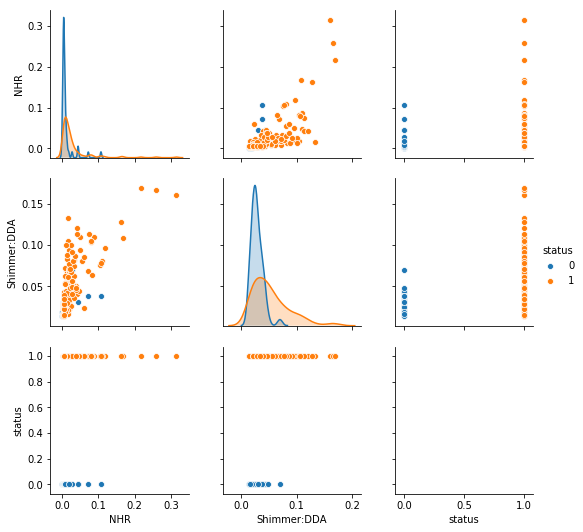

In [83]:
sns.pairplot(df[['NHR','Shimmer:DDA','status']], hue='status')

In [84]:
#So even though 'MDVP:Fhi(Hz)', 'NHR' are not Correlated witht 'status', still they are contributing when combined
#with other independent variable like skimmer etc ........and for that reason dint drop those 3 columns.

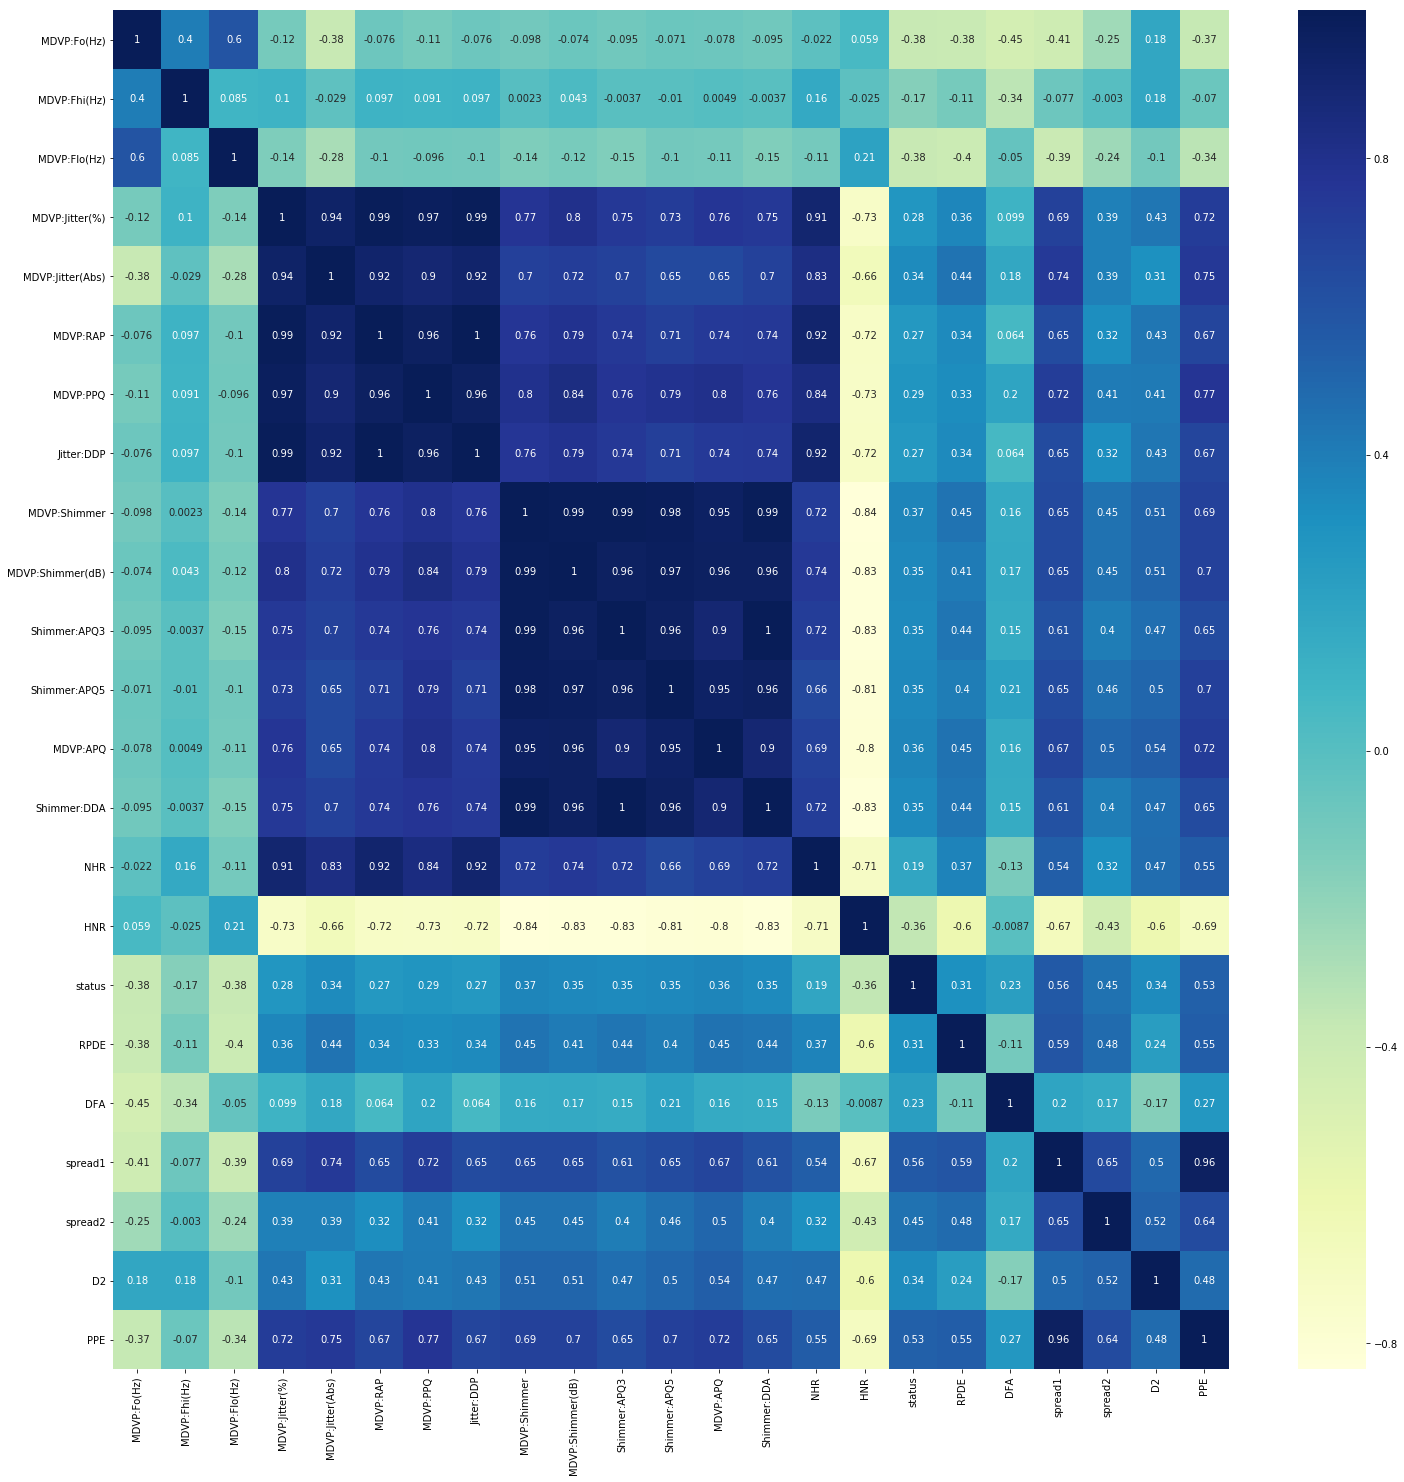

In [85]:
#To find out how independent variable are correlated to each other we use df.corr() i.e pearsons method as both columns
#under comparision are Numberic in Nature .

#In General For a Better model there should be good correlation between independent columns and dependent column ,
#but independent columns should be independent of each other :)

#########################################################################################################################
#But DECISSION TREE and BOOSTING TREE Algorithms are Immune to MULTICOLINIEARITY , So even thought there are some Deep Blues
# in the heatmap (i.e there are independent variables in correlation with each other) might not effect ModelsPerformance much
#and on top these independents variables in combination with others are making classification better in this data set...so
#dint drop the correlated columns .....
#########################################################################################################################

plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [86]:
#From the Pair Plot below we can visually See More 'Orange' than 'Blue'.From this we can Conclude that the dataset has more
#Positive cases compared to Negative as 'Organge' represents 1 and 'Blue' represents 0....So there is a slight chance of
#FP(False Positive) dominating  -i.e The model might comeup with positive for parkinsons and in reality its not the case.

#But from Pair Plot we can also see a Huge overlap between distributions of positive and negative ..so this might also 
#result in FN(False Negatives)

#Since it a Medical Sytem our Focus Should be More on Improving the Recall i.e Reducing the FN(False Negative)

<Figure size 2160x2160 with 0 Axes>

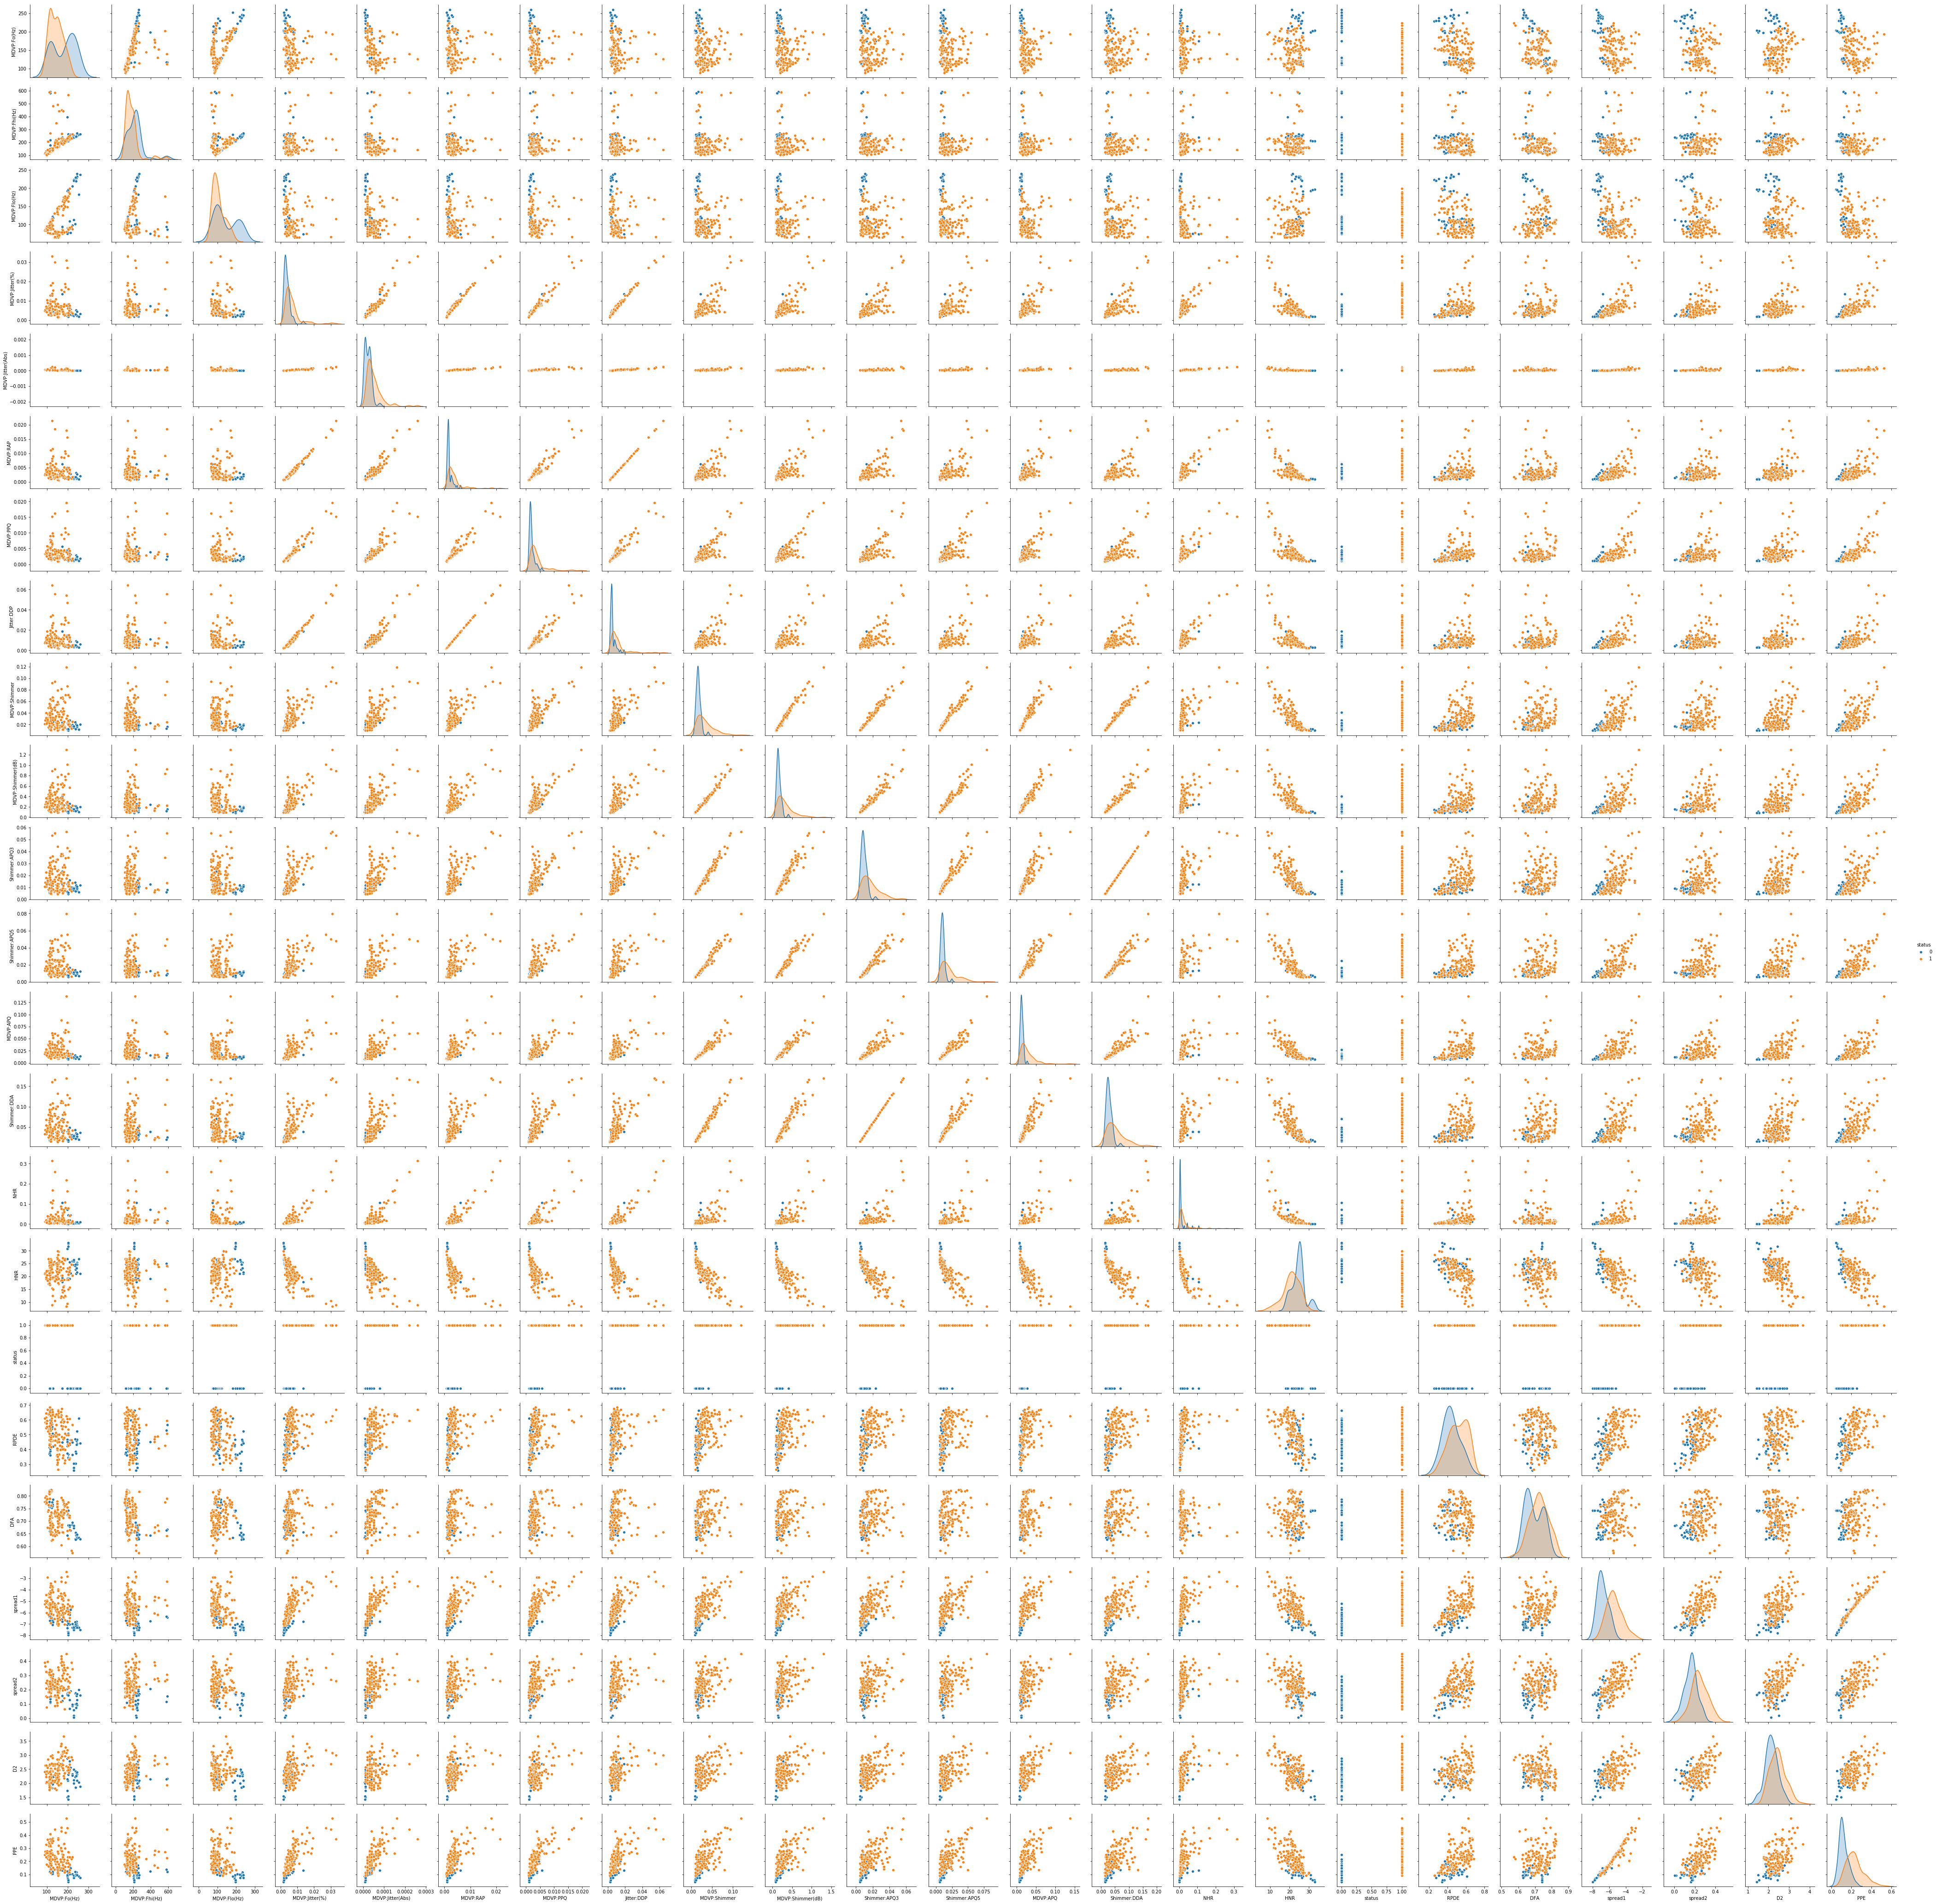

In [87]:
plt.figure(figsize=(30,30))
sns.pairplot(df, hue='status')

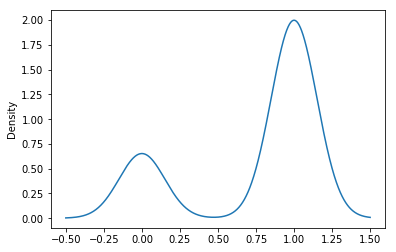

In [88]:
#We can also conclude from the distribution of output i.e 'status' column that dataset has more positive cases compared to negative cases
df['status'].plot(kind='kde')

In [89]:
#Lets Confirm the above logic by finding out percentage of positive and negative cases.....
print (" Percentage of Positive Records : {0}".format(df.loc[df['status'] == 1, :].shape[0]/df.shape[0]))
print (" Percentage of Negative Records : {0}".format(df.loc[df['status'] == 0, :].shape[0]/df.shape[0]))

 Percentage of Positive Records : 0.7538461538461538
 Percentage of Negative Records : 0.24615384615384617


In [90]:
#We can Use SMTOTE as the data is imbalanced .....but its not part of sklearn..and on top

#Decision trees,have been among the more popular algorithms that have been significantly helped by sampling methods for 
#countering the high imbalance in class distributions....So this is one of the reasons not to force SMOTE kind of stuff 

In [91]:
#Lets Check How the Individual Distributions of Independent Variables Look and what can we infer from them 

In [92]:
#In Non Parametric methods no such feature of distribution is used for modelling. 

#Primarily in Decision trees (say CART) it takes into account which variable/split, reduces impurity(gini or entropy)
#and maximizes information gain. In such a case , the distribution does not really matter.

#Decission tree does not make any assumption about the distribution of the original or the resultant population. 
#Hence, the nature of the distribution would not matter much in implementing decision trees.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF04775BA8>,
      dtype=object)

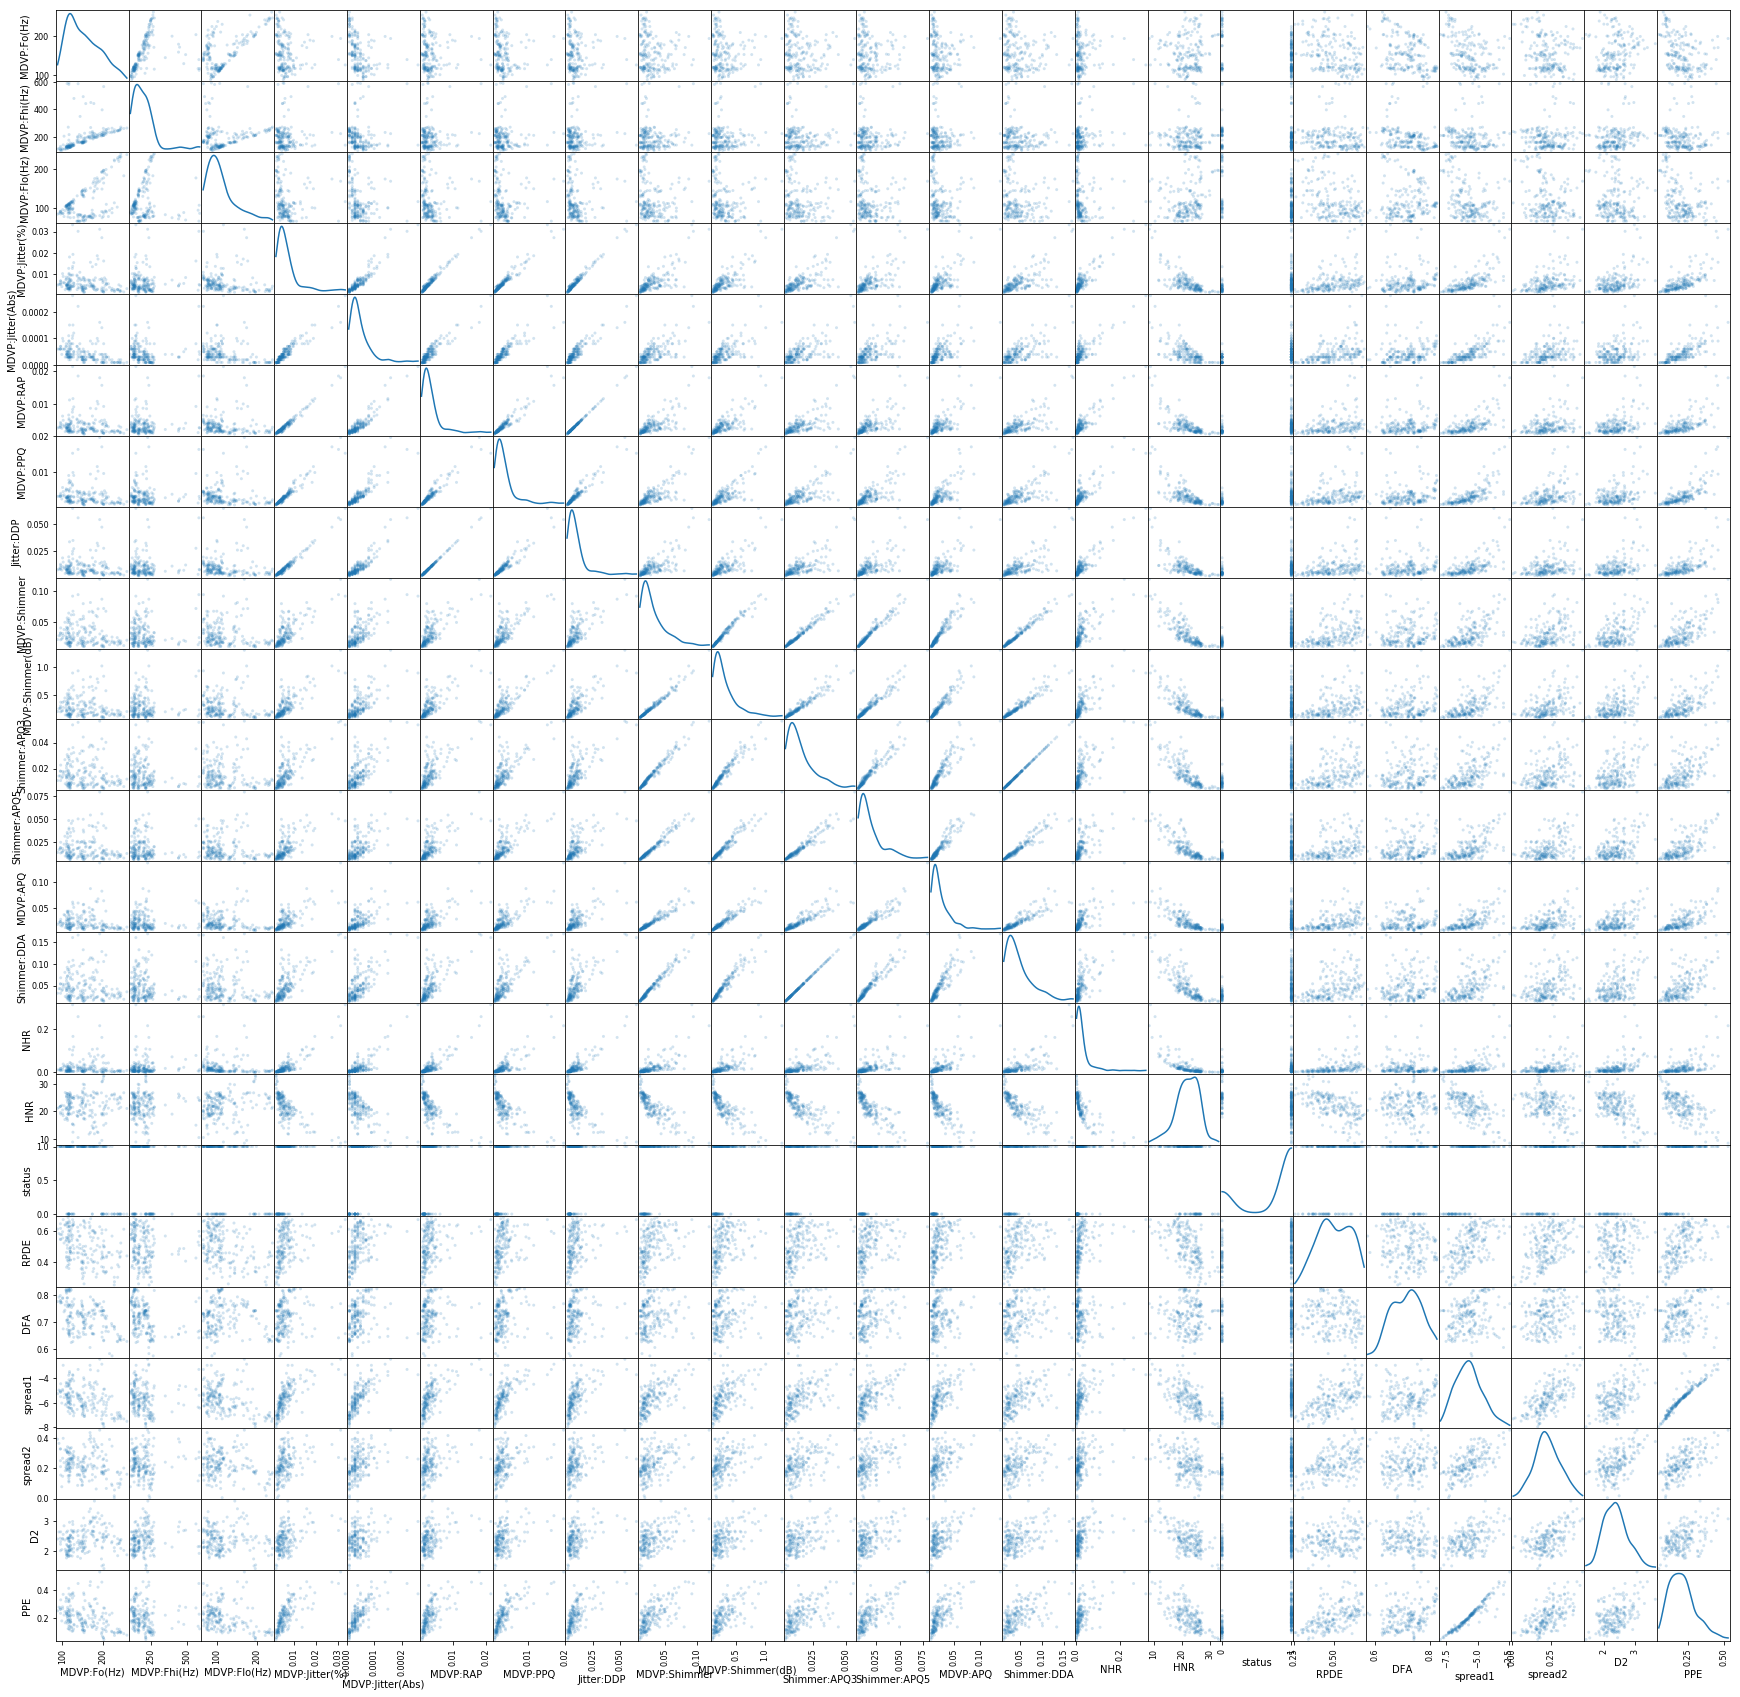

In [93]:
#QUICKY OVERVIEW OF DISTRIBUTIONS OF ALL THE COLUMNS using a Scatter Matrix
scatter_matrix(df, alpha=0.2,figsize=(30,30),diagonal='kde')

In [94]:
#Most of the Independet columns are Righ Skewed form the scatter matrix above .........we can also see some evident linear
#relation between some independent variables belonging to same family like shimmer etc.....

In [95]:
df.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [96]:
#Just a Check on Outliers using BoxPlot

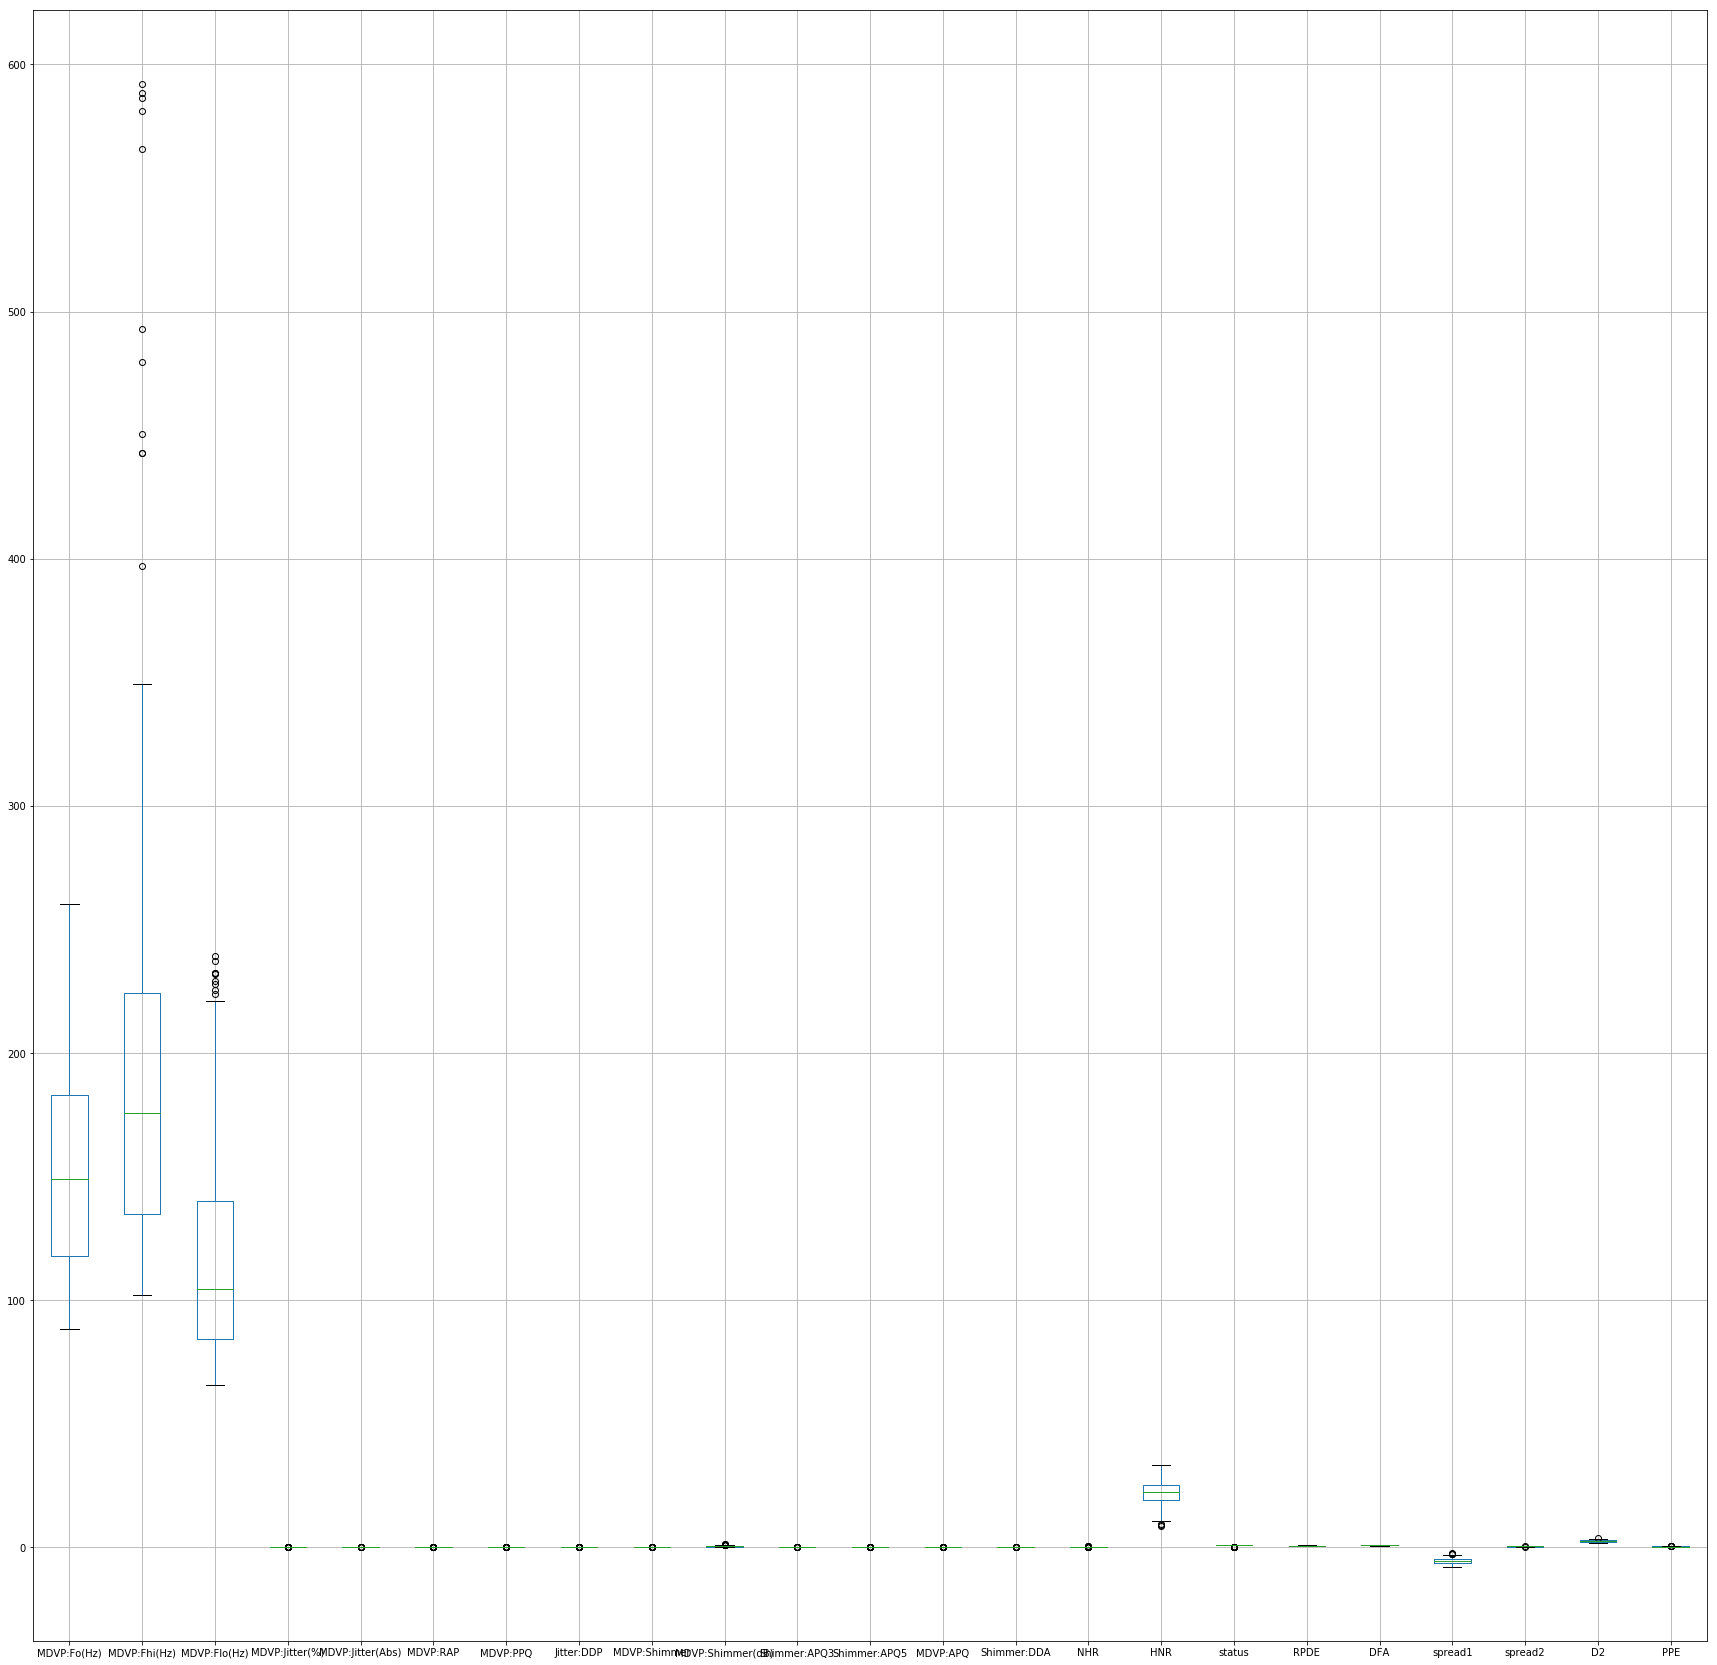

In [97]:
plt.figure(figsize=(30,30))
df[list(df.columns)].boxplot()

In [98]:
#Decission Tree are Robust to Outliers and might have neglible effect on model as the nodes are determined based on the
#sample proportions in ech split region.....I confirmed this by using MinMax-Scaler and there is no Impact on the outcome :)

#For information , column MDVP:Fo(Hz) has maximum outliers followed by  column MDVP:Flo(Hz)

In [99]:
##########################Question 4 & 5 :Splittign in Ration of 70:30 and and fit in to Training Data

In [100]:
#####  BEFORE STARTING APPLYING DECISSON TREE AND RANDOMFOREST ...WOULD LOVE TO FIND OUT WHICH Ensembled Method out of 4
#Ensebled Techniques we learnt ..Random Forest, AdaBoost and Gradient Boost ......is doing Good

# Have Also Included Decission Tree Just For Comparision thought its not an ensembled method.
#Boosting vs Bagging -- :)

AUC(Area Under the Curve) and Corss Validation Accuracy(5 folds) :

____________________________________________________________________________________________

DecissionTree Classifier
_________________________
Train Accuracy  : 1.0
Cross Validation mean Test Accuracy for 5 folds is : 0.7538461538461538
DecissionTree Classifier - AUC - 0.7482758620689656
From AUC the modle has 74.83% chances of Distinguishing between Positive and Negative Classes


RandromForest Classifier
_________________________
Train Accuracy  : 1.0
Cross Validation mean Test Accuracy for 5 folds is : 0.758974358974359
RandomForest Classifier - AUC - 0.9413793103448276
From AUC the modle has 94.14% chances of Distinguishing between Positive and Negative Classes


AdaBoost Classifier
_________________________
Train Accuracy  : 1.0
Cross Validation mean Test Accuracy for 5 folds is : 0.7487179487179487
AdaBoost Classifier - AUC - 0.9137931034482758
From AUC the modle has 91.38% chances of Distinguishing between Pos

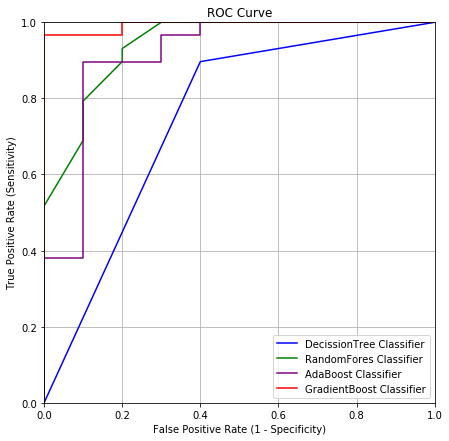

In [103]:
#Comparing ROC, AUC and Kfold Mean Validation for all the models with default parameters .....i.e we dint Tune
#Hyper Parameters for any of the Models below.

#The function Plot_Roc_All is my Own function whose definition is in the starting of the NoteBook.

#The plot of ROC's , helps to compare the Classification Models :)

Plot_Roc_All(df,0, 'status', folds=5)

In [104]:
#Looks Like GradientBoost in Red is Performing the Best followed  by RandomForest in Green and AdaBoost in Purple and 
# Decission Tree in Blue .

In [105]:
#So Boosting is Doing Better than Bagging here:)

#There is a War Between AdaBoost and RandomForest and as the folds increases I see the war between them grows stronger.
#Right Now 5 folds are used and when the Folds reach 10 both AdaBoost and RandomForest are doing very similar.

In [106]:
#All the 4 models are overfitting without Regularization in form of Tuning HyperParameters.

In [107]:
####################Question 4 & 5 & 6 - Creeate Model Using Enropy Method and it it to training data

In [108]:
####################            Trying Decission Tree without any REGULARIZATION         ################################

In [109]:
#######Here I am using My Own Helper Function  to make life easier and to avoid Code Duplicatoin . 
#test_size is 0.3 which is default to this Helper Function.

#When passing second parameter(i.e input as zero) it means I am considering all Independent columns and the 3rd parameter
#is output column ...All the hyper parameters like max_depth, min_samples_split , max_features etc are set to None by
#default untill I specify explicitly 

#Here criterion is 'entropy'

#Code for the Helper function is presented in the starting of the Notebook

In [110]:
#In Questin its mentioned to use CrossTAB on y_pred and y_test . Here in the Helper Function I have used 
#Confusin Matrix in place of CrossTab ..as Both Give same Result 

#Mentioning few way to print confusion matrix or cross tab, just for info.
#print(confusion_matrix(y_test, y_pred))
#print(pd.crosstab(y_test, y_pred))
#############Found the below stylish way to print cross tab from an article :).....
#print(pd.crosstab(y_test.ravel(), y_pred, rowname=['True'], colnames=['Predicted'], margins=True))

In [ ]:
#Roc = True , will print the Roc Curve 

<class 'pandas.core.frame.DataFrame'>
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[14  2]
 [ 2 41]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 1.0

Test Accuracy   : 0.9322033898305084

Precision Score : 0.9534883720930233

Recall Score    : 0.9534883720930233

F1 Score        : 0.9534883720930233

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.95   

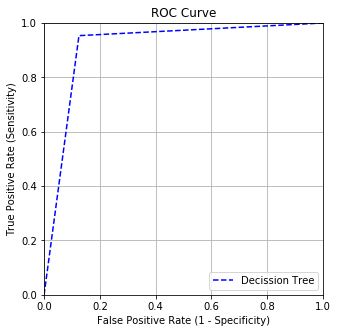

In [149]:
Use_DecissionTree(df, 0, 'status', Roc=True)

In [112]:
#Model is Clearly Overfitting (as training accuracy is 1 and testing accuracty in 93)...
#even though from AUC(Area Under the Curver) we know that it model has 91.42% chances of distinquishing between Positive and Negative Classes 

#We Need Regulatization to bring the model out of overfit.
#we Need to Reduce the Variance and Improve the Bias to bring the Model out of Overfit.....

In [113]:
###################### Question 7    - Use Regularization of max_depth and min_sample_leaf to recreate the Model

In [114]:
####################        My Own Grid Search :)...Time to Reqularize

In [ ]:
####After trying GrisearchCV , I found  that own for loops to be more flexible as I can check for a conditions like
# if((training_error - testing error) <= 1.5) ...then give me that hyper parameters ...For that flexibility I used
#my own loops to crack the required Hyperparameters for Regularization

In [115]:
#Trying to find the max_depth and min_samples_leaf combination where my Training Accuray and Testing Accuracy differ by 
#just 1.5 %........I tried to find out for 1% but nothing got hit , so Moved to 1.5%

In [116]:
for max_depth in range(2, 20):
    for min_samples_leaf in range(1,10):
        X = df.drop('status', axis=1)
        Y= df['status']
        x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=10)
        model = DecisionTreeClassifier(criterion = 'entropy', random_state=11, max_depth = max_depth, min_samples_leaf = min_samples_leaf)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        train_accuracy = accuracy_score(y_train, model.predict(x_train))
        test_accuracy = accuracy_score(y_test, y_pred)
        train_accuracy = train_accuracy*100
        test_accuracy = test_accuracy*100
        if(train_accuracy == 1):
            continue
        #THIS IS THE CHECK TO FIND ONLY THOSE Combinations for which training-testing accuracy differ by only 1.5%    
        if((abs(train_accuracy-test_accuracy)) <= 1.5):
                print(model)
                print("Train Accuracy is :{0} and Test Accuracy is {1}".format(train_accuracy, test_accuracy))
                print("max_depth = {0} and min_samples_leaf = {1}".format(max_depth, min_samples_leaf))
                print("Precision Score : {0}".format(precision_score(y_test,y_pred)))
                print("Recall Score    : {0}".format(recall_score(y_test,y_pred)))
                print("\n")
                del(model)
                del(y_pred)
        

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')
Train Accuracy is :91.17647058823529 and Test Accuracy is 89.83050847457628
max_depth = 3 and min_samples_leaf = 1
Precision Score : 0.9743589743589743
Recall Score    : 0.8837209302325582


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')
Train Accuracy is :91.17647058823529 and Test Accuracy is 89.83050847457628
max_depth = 3 and min_samples_leaf = 

Precision Score : 0.9767441860465116
Recall Score    : 0.9767441860465116


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')
Train Accuracy is :95.58823529411765 and Test Accuracy is 96.61016949152543
max_depth = 14 and min_samples_leaf = 6
Precision Score : 0.9767441860465116
Recall Score    : 0.9767441860465116


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')
Train Accuracy is :95.588235294117

In [117]:
#For same max depth and different min_samples_leaf the the accuracy values are coming up as same and it is expected behaiour:)
# As max_samples_leaf increases then depth of the tree decreases .........

#So found that max_depth=4
#min_samples_leaf=6 
#is giving Great Accuracy Scores as well as Good Prcission and Recall

#Train Accuracy  : 0.9558823529411765
#Test Accuracy   : 0.9661016949152542
#Precision Score : 0.9767441860465116
#Recall Score    : 0.9767441860465116


In [118]:
########### But Since its a Medical System that we are dealing here,  I want to also find the Combinatin where Recall is 1.

In [119]:
for max_depth in range(2, 20):
    for min_samples_leaf in range(1,10):
        X = df.drop('status', axis=1)
        Y= df['status']
        x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=10)
        model = DecisionTreeClassifier(criterion = 'entropy', random_state=11, max_depth = max_depth, min_samples_leaf = min_samples_leaf)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        train_accuracy = accuracy_score(y_train, model.predict(x_train))
        test_accuracy = accuracy_score(y_test, y_pred)
        train_accuracy = train_accuracy*100
        test_accuracy = test_accuracy*100
        #Avoding Overfit when Training accuracy is 1.
        if(train_accuracy == 1):
            continue
        #Check for 100% Recall##########################################################
        if(recall_score(y_test, y_pred) == 1):
                print(model)
                print("Train Accuracy is :{0} and Test Accuracy is {1}".format(train_accuracy, test_accuracy))
                print("max_depth = {0} and min_samples_leaf = {1}".format(max_depth, min_samples_leaf))
                print("Precision Score : {0}".format(precision_score(y_test,y_pred)))
                print("Recall Score    : {0}".format(recall_score(y_test,y_pred)))
                print("\n")
                del(model)
                del(y_pred)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')
Train Accuracy is :85.29411764705883 and Test Accuracy is 89.83050847457628
max_depth = 2 and min_samples_leaf = 1
Precision Score : 0.8775510204081632
Recall Score    : 1.0


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')
Train Accuracy is :85.29411764705883 and Test Accuracy is 89.83050847457628
max_depth = 2 and min_samples_leaf = 2
Precision Sco

In [120]:
#Here at max_depth=2 
#min_samples_leaf=9 
#we get a Recall of 1

#Train Accuracy  : 0.8529411764705882
#Test Accuracy   : 0.8983050847457628
#Precision Score : 0.8775510204081632
#Recall Score    : 1.0

In [121]:
#################################################################################################

In [122]:
                  ############### USING THE TUNED PARAMETERS IN DECISSION TREE  #################

In [123]:
#################################################################################################

<class 'pandas.core.frame.DataFrame'>
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[15  1]
 [ 1 42]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9558823529411765

Test Accuracy   : 0.9661016949152542

Precision Score : 0.9767441860465116

Recall Score    : 0.9767441860465116

F1 Score        : 0.9767441860465116

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1  

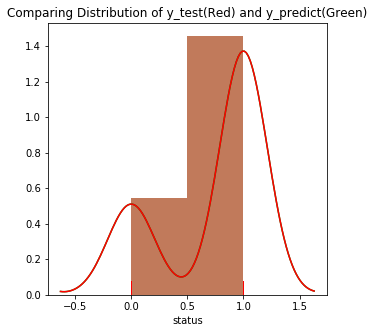

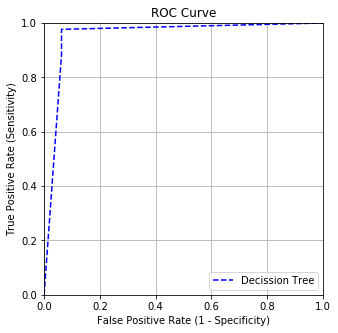

In [124]:
#First Trying out max_depth=4,min_samples_leaf = 6 (which i got from my own grid search for loop code :) )
Use_DecissionTree(df, 0, 'status', max_depth=4, min_samples_leaf=6, plot=True,plot_dt=True,Roc=True)

In [125]:
#Distributin of y_pred and y_test overlapped ...so we can see only Red.......Looks y_pred is very closely following y_test.

In [126]:
#Hurayy..Got the same prediction and accuracy and recall as give by my grid-search function 
#Train Accuracy  : 0.9558823529411765
#Test Accuracy   : 0.9661016949152542
#Precision Score : 0.9767441860465116
#Recall Score    : 0.9767441860465116
#F1 Score        : 0.976744186046511

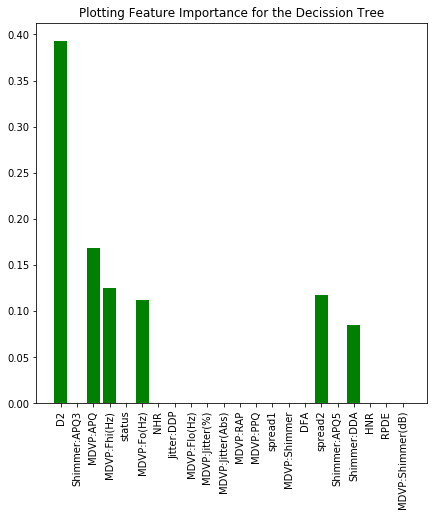

In [127]:
#My own Helper Function to Plot the Feature Importance of the Decission Tree.....Code of the Function is Present in the
#Starting of the Notebook , under 'My Helper Functions' comment.

#The Main Logic is present in the Use_DecissionTree function and plotting logic in plot_features_tree function .
#indices = np.argsort(model.feature_importances_)[::-1] (The main logic is to use model.feature_importance and sort)

plot_features_tree(size=7)

In [ ]:
#All the Features are not Considered by Decission Tree..... :)

Decission Tree
_____________________________________________________



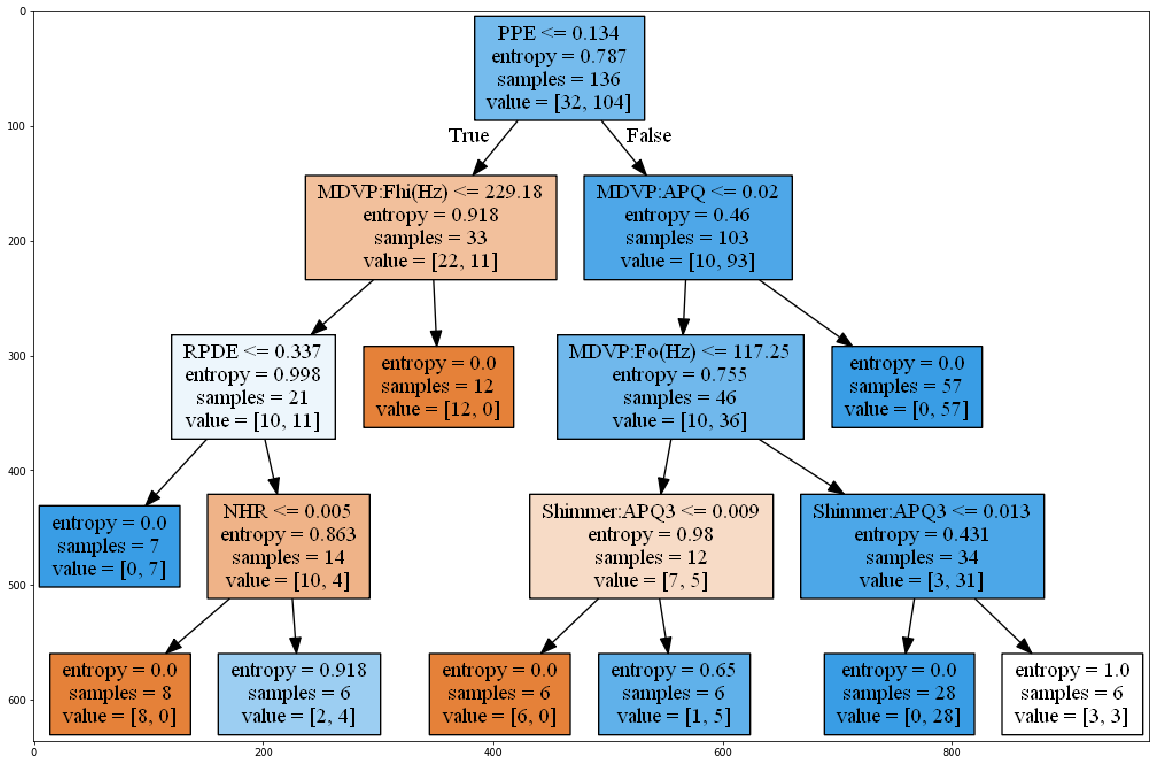

In [128]:
#plot_decssion_tree is my own helper funcion present in the starting of notebook.
plot_decission_tree(size=20)

In [129]:
###-----------------------MODEL FOR GOOD RECALL NOW ----##########(More needed for a Medical Sytem like the one given)
## I can let System say Someone does not have Parkinsons and in reality he has i.e FN ....This might cause lives ...
#So I am more focused on Getting 100% Recall

<class 'pandas.core.frame.DataFrame'>
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[10  6]
 [ 0 43]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.8529411764705882

Test Accuracy   : 0.8983050847457628

Precision Score : 0.8775510204081632

Recall Score    : 1.0

F1 Score        : 0.9347826086956522

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       1.00      0.62      0.77        16
           1       0.88      

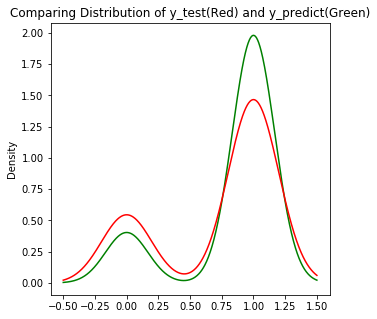

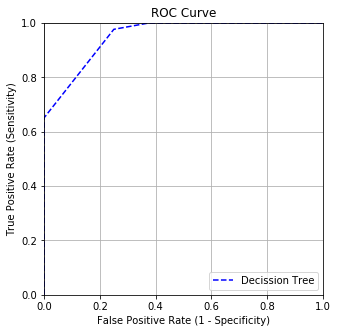

In [130]:
#This Combination for high Recall is  max_depth=2, min_samples_leaf=9
Use_DecissionTree(df, 0, 'status', max_depth=2, min_samples_leaf=9, plot_simple=True,plot_dt=True, Roc=True)

In [131]:
#Here the y_pred distribution is a bit deviated from y_test but we have a 100% Recall which is needed by Medical Systems
#Train Accuracy  : 0.8529411764705882
#Test Accuracy   : 0.8983050847457628
#Precision Score : 0.8775510204081632
#Recall Score    : 1.0
#F1 Score        : 0.934782608695652

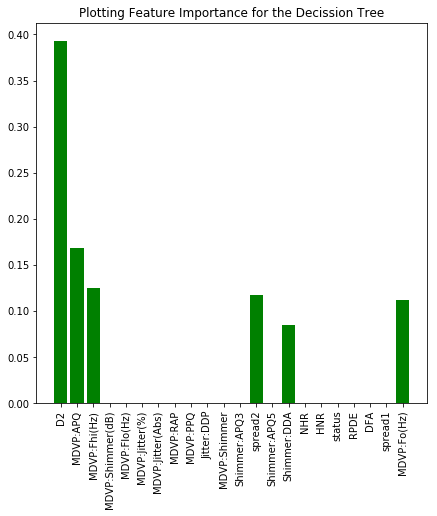

In [132]:
plot_features_tree(size=7)

Decission Tree
_____________________________________________________



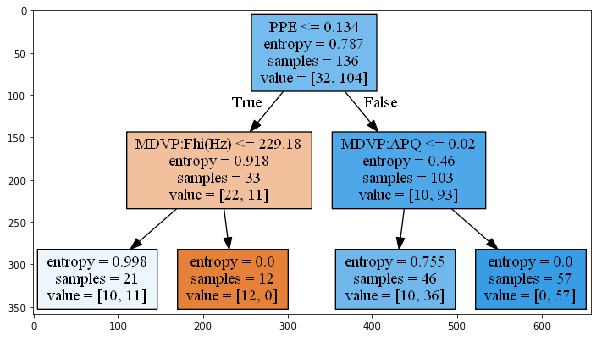

In [133]:
plot_decission_tree(size=10)

In [ ]:
##########################################################################################################################

In [134]:
##############CONCLUSION on DECISSION TREE ALGO

In [135]:
 # max_depth=4, min_samples_leaf=6  for overall good accuracy, precission and recall
          #Train Accuracy  : 0.9558823529411765
          #Test Accuracy   : 0.9661016949152542
          #Precision Score : 0.9767441860465116
          #Recall Score    : 0.9767441860465116
          #F1 Score        : 0.976744186046511
    
 # max_depth =2 , min_samples_leaf=9 for 100% Recall with some compromise in Precision and Overall Accuracy.
        #Train Accuracy  : 0.8529411764705882
        #Test Accuracy   : 0.8983050847457628
        #Precision Score : 0.8775510204081632
        #Recall Score    : 1.0
        #F1 Score        : 0.934782608695652
        

 #I Think for a medical SYSTEM its Wise to Consider the one with 100% Recall and some sacrifice in Precission and Accuracy

In [136]:
#HOW REGULARIZATION HELPS ?

In [137]:
#In General as the depth of the tree Increases the Variance too increases and Bias Decreases ..So the Model tend to 
#Overfit....So we can Reduce the Depth of the Tree to bring the Model out of Overfitting ....

In [138]:
#Two Popular Paraetersfor controling the depth of the Tree are 
#max_depth ---- as max_depth increases the depth of the tree increases too.
#min_samples_leaf   ---- as min_samples_leaf increases the depth of the tree reduces 

In [139]:
#So Regularization in Terms of Decission Tree is Tuning the Hyperparameters like max_depth and min_samples_leaf etc
#to Get an optimal Model which  does not overfit and give good accuracy , Prediction and Recall as per Requirement


In [ ]:
#Lests See if RandomForest Can Come Up with a Better Solution ...........................................

In [140]:
#####################Question 8 -- Use Random Forst and find the Accuracy

In [141]:
#With Single Decission Tree ---- # max_depth=4, min_samples_leaf=6 gave good overall accuracy ....
#So I will fix max_depth=4 and min_samples_leaf=6  and Run a Search loop on n_estmators value from 2 to 100 ..with a 
#condition where (tainaccury - testaccuracy ) < 1% ...and at the point I will take the n_estmators 

In [142]:

for n_estimators in range(2,100):
    X = df.drop('status', axis=1)
    Y= df['status']
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=10)
    model = RandomForestClassifier(criterion = 'entropy', random_state=11,max_depth=4, min_samples_leaf=6, n_estimators=n_estimators)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    train_accuracy = accuracy_score(y_train, model.predict(x_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = train_accuracy*100
    test_accuracy = test_accuracy*100
    if(train_accuracy == 1):
        continue
    #THIS IS THE CHECK TO FIND ONLY THOSE Combinations for which training-testing accuracy differ by only 1.5%    
    if((abs(train_accuracy-test_accuracy)) <= 1):
            print(model)
            print("Train Accuracy is :{0} and Test Accuracy is {1}".format(train_accuracy, test_accuracy))
            print("n_estimators = {0}".format(n_estimators))
            print("Precision Score : {0}".format(precision_score(y_test,y_pred)))
            print("Recall Score    : {0}".format(recall_score(y_test,y_pred)))
            print("\n")
            del(model)
            del(y_pred)
        

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
            oob_score=False, random_state=11, verbose=0, warm_start=False)
Train Accuracy is :93.38235294117648 and Test Accuracy is 93.22033898305084
n_estimators = 7
Precision Score : 0.9148936170212766
Recall Score    : 1.0


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=None,
            oob_score=False, random_state=11, verbose=0, warm_start=False)
Train Accuracy is :93.38235

In [143]:
#So with n_estimators=7, max_depth=4, min_sampls_leaf=6 we are gettin best possible score with Recall 1 and also Good 
#Precission and Overall Accuracy .

In [ ]:
#Time to Try n_estimators=7, max_depth=4 , min_samples_leaf=6 on RandomForest for  Real :) :) 

In [ ]:
#I have used my own Helper Function names Use_RandomForest whoes definition in the starting of the notebook....
#Helper functions are just to make life easy and to avoid code duplications ....

<class 'pandas.core.frame.DataFrame'>
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
            oob_score=False, random_state=11, verbose=0, warm_start=False)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[12  4]
 [ 0 43]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9338235294117647

Test Accuracy   : 0.9322033898305084

Precision Score : 0.9148936170212766

Recall Score    : 1.0

F1 Score        : 0.9555555555555556

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       1.0

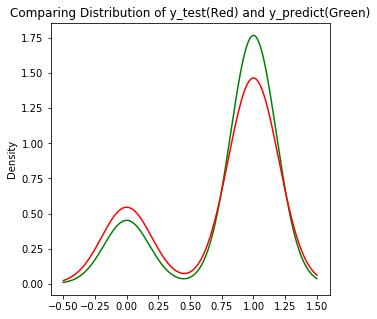

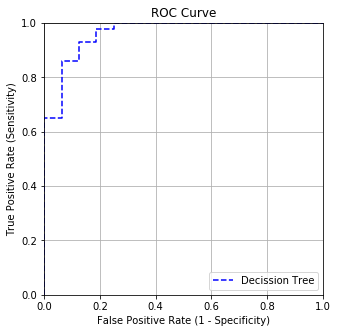

In [144]:
Use_RandomForest(df, 0, 'status', max_depth=4, min_samples_leaf=6, n_estimators=7, Roc=True, plot_simple=True)

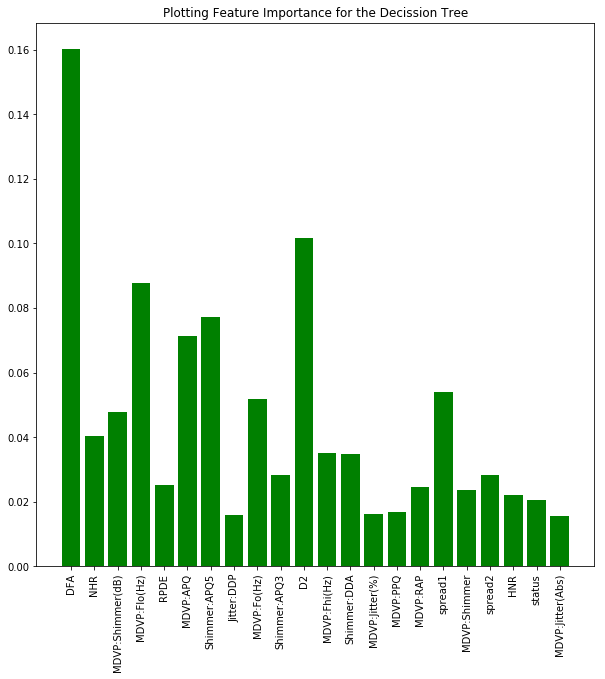

In [145]:
plot_features_tree(size=10)

In [146]:
#RandomForest considered All Features , Unlike Decission Tree which Considred only Few ....
#This show that Sampling in RandomForest is done Column or Feature wise (unlike in Bagging which is done row wise).
#When Sampling is done FeatureWise each tree might end up with High Variance and Varience will be cancelled out when 
#we ensemble ....So That might be the reason for an Ensembled Technique like RANOMFOREST doing beter than DecissionTree...

In [147]:
#So Far in Decission Tree vs RandomForest ......Clearly RandomForest is the Winner and below model with 
# max_dept=4, min_samples_leaf=6, n_estimators=7 is the Best I derived so Far
#Here the Recall is 100% and also Precission and Overall Accuracy are Good Too.......

In [ ]:
#------------------------------------------FINAL CONCLUSION --------------------------------------------------------------#

In [ ]:
#Plotting ROC Curver for the two Final Models to Compare them Graphically 
# 1) Decission Tree with max_depth = 4 and min_samples_leaf=6
# 2) RandomForest with max_depth = 4, min_samples_leaf=6 , n_estimators=7

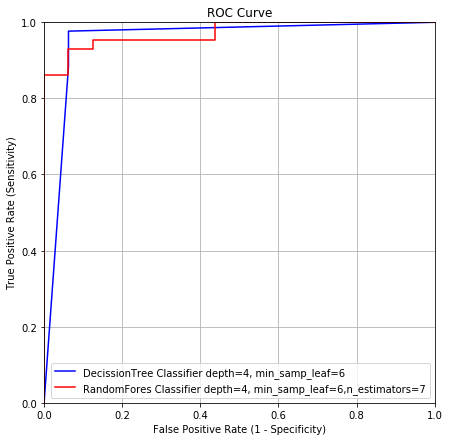

In [171]:
    X = df.drop('status', axis=1)
    Y = df['status']
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = 0.3, random_state=10)
       
    model = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=6, random_state=11).fit(x_train,y_train)
    fpr1, tpr1, thresholds1 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
       
    model = RandomForestClassifier(criterion='entropy',max_depth=4, min_samples_leaf=6, n_estimators=7).fit(x_train,y_train)
    fpr2, tpr2, thresholds2 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    
    plt.figure(figsize=(7,7))
    plt.plot(fpr1, tpr1, color='blue',label='DecissionTree Classifier depth=4, min_samp_leaf=6')
    plt.plot(fpr2, tpr2, color='red', label = 'RandomFores Classifier depth=4, min_samp_leaf=6,n_estimators=7')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.legend(loc='lower right')
    
    

In [ ]:
##########Decission Tree with max_depth=4 and min_samples_leaf = 6
#Train Accuracy  : 0.9558823529411765
#Test Accuracy   : 0.9661016949152542
#Precision Score : 0.9767441860465116
#Recall Score    : 0.9767441860465116
#F1 Score        : 0.976744186046511

In [ ]:
#Giving More Importance to Recall and Conidering the closeness of Trainign and Testing Accuracy..The Winner is RandomForest
#Recall is Given More Importance as Its a Medical System ..There is a great need to elminate FN ...

In [ ]:
#########################################  WINNER IS RANDOMFOREST ######################################################
# max_dept=4, min_samples_leaf=6, n_estimators=7
#Train Accuracy  : 0.9338235294117647
#Test Accuracy   : 0.9322033898305084
#Precision Score : 0.9148936170212766
#Recall Score    : 1.0
#F1 Score        : 0.9555555555555556